<a href="https://colab.research.google.com/github/IevgenTs/uoft-ml-3253-assignments/blob/main/final-project/final_project_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Data

In [ ]:
#%pip install pandas matplotlib seaborn statsmodels numpy plotly geopandas


In [ ]:
import os
os.chdir(r"C:\Users\TSYG\Desktop\SCS_3253_086 Machine Learning\ML Project")
print("Current working directory:", os.getcwd())
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests, ccf
import numpy as np
import plotly.express as px
from datetime import datetime
import geopandas as gpd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)
from utils import *

Current working directory: C:\Users\TSYG\Desktop\SCS_3253_086 Machine Learning\ML Project


In [ ]:
df = pd.read_csv(r'C:\Users\TSYG\Desktop\SCS_3253_086 Machine Learning\ML Project\master_complete.csv')

#Analysing main dataset

In [ ]:
df.head(5)

,county_fips,date,county,state,lat,lng,population,canopy_cover_percent,overhead_transmission_line,underground_transmission_line,...,Event_Wildfire,Event_Winter Storm,Event_Winter Weather,outage_customer_ave,outage_minutes,temp,windspeed,precip,median_income,poverty_percent
0,45001,2014-11-04,abbeville,south carolina,34.2226,-82.4593,24352,0.58092,40,0,...,0,0,0,0.0,0,11.292083,2.023333,100.746667,51580.0,0.15
1,45001,2014-11-05,abbeville,south carolina,34.2226,-82.4593,24352,0.58092,40,0,...,0,0,0,0.0,0,14.072083,1.498333,100.521250,51580.0,0.15
2,45001,2014-11-06,abbeville,south carolina,34.2226,-82.4593,24352,0.58092,40,0,...,0,0,0,0.0,0,16.577917,3.044167,99.689167,51580.0,0.15
3,45001,2014-11-07,abbeville,south carolina,34.2226,-82.4593,24352,0.58092,40,0,...,0,0,0,0.0,0,11.150833,1.549583,99.767083,51580.0,0.15
4,45001,2014-11-08,abbeville,south carolina,34.2226,-82.4593,24352,0.58092,40,0,...,0,0,0,4.0,90,8.710833,1.150833,99.744167,51580.0,0.15


In [ ]:
# Get the shape (rows, columns)
df.shape

(10172145, 73)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10172145 entries, 0 to 10172144
Data columns (total 73 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   county_fips                       int64  
 1   date                              object 
 2   county                            object 
 3   state                             object 
 4   lat                               float64
 5   lng                               float64
 6   population                        int64  
 7   canopy_cover_percent              float64
 8   overhead_transmission_line        int64  
 9   underground_transmission_line     int64  
 10  social_vulnerability_percent      float64
 11  Event_Astronomical Low Tide       int64  
 12  Event_Avalanche                   int64  
 13  Event_Blizzard                    int64  
 14  Event_Coastal Flood               int64  
 15  Event_Cold/Wind Chill             int64  
 16  Event_Debris Flow                 

##Creating subset of data for ChatGPT processing

In [ ]:
# #To select first 100,000 rows
# sample_df = df.iloc[:100000]

# # Save the sample_df to a new CSV file
# sample_df_path = "C:\\Users\\TSYG\\Desktop\\SCS_3253_086 Machine Learning\\ML Project\\sample_texas_with_lagged_features_filtered.csv"
# sample_df.to_csv(sample_df_path, index=False)

# sample_df.shape

##Number of entries per county and number of counties

In [ ]:
#To verify that every county_fips has exactly 3348 records
# Count records per county_fips (formatted)
fips_counts = df['county_fips'].value_counts()

# Check if all values are equal to 3348
all_match = (fips_counts == 3348).all()

print("All counties have 3348 records:", all_match)

All counties have 3348 records: False


In [ ]:
#To calculate the number of unique FIPS codes (i.e., counties) in dataset
# Count unique county FIPS values
num_fips = df['county_fips'].nunique()

print("Number of unique counties (FIPS):", num_fips)

Number of unique counties (FIPS): 3041


## Top 10 Most Frequent Weather Events in US

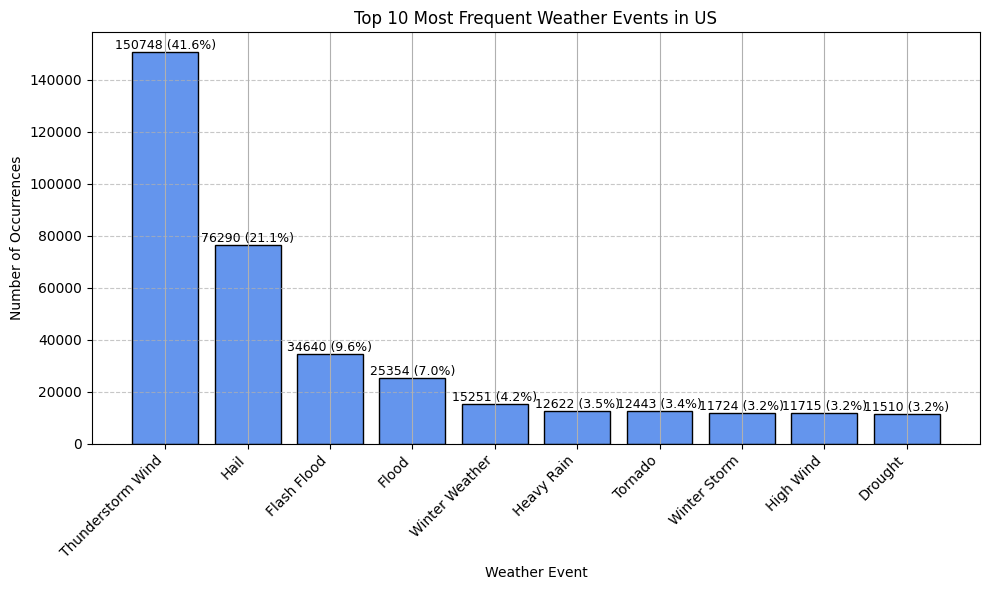

In [ ]:
# Calculate Top 10 Most Frequent Weather Events In US

# Group data again in case of updates
event_columns = [col for col in df.columns if col.startswith("Event_")]
event_sums = df[event_columns].sum().sort_values(ascending=False)
top_10_events = event_sums.head(10)

# Recalculate percentages
total_events = top_10_events.sum()
percentages = (top_10_events / total_events) * 100

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_events.index.str.replace("Event_", ""), top_10_events.values, color='cornflowerblue', edgecolor='black')

# Add counts and percentages
for bar, count, pct in zip(bars, top_10_events.values, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             f'{count} ({pct:.1f}%)', ha='center', va='bottom', fontsize=9)

plt.title("Top 10 Most Frequent Weather Events in US")
plt.xlabel("Weather Event")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(True)
plt.show()


## Yearly Distribution of Top 10 Weather Events in US

<Figure size 1400x800 with 0 Axes>

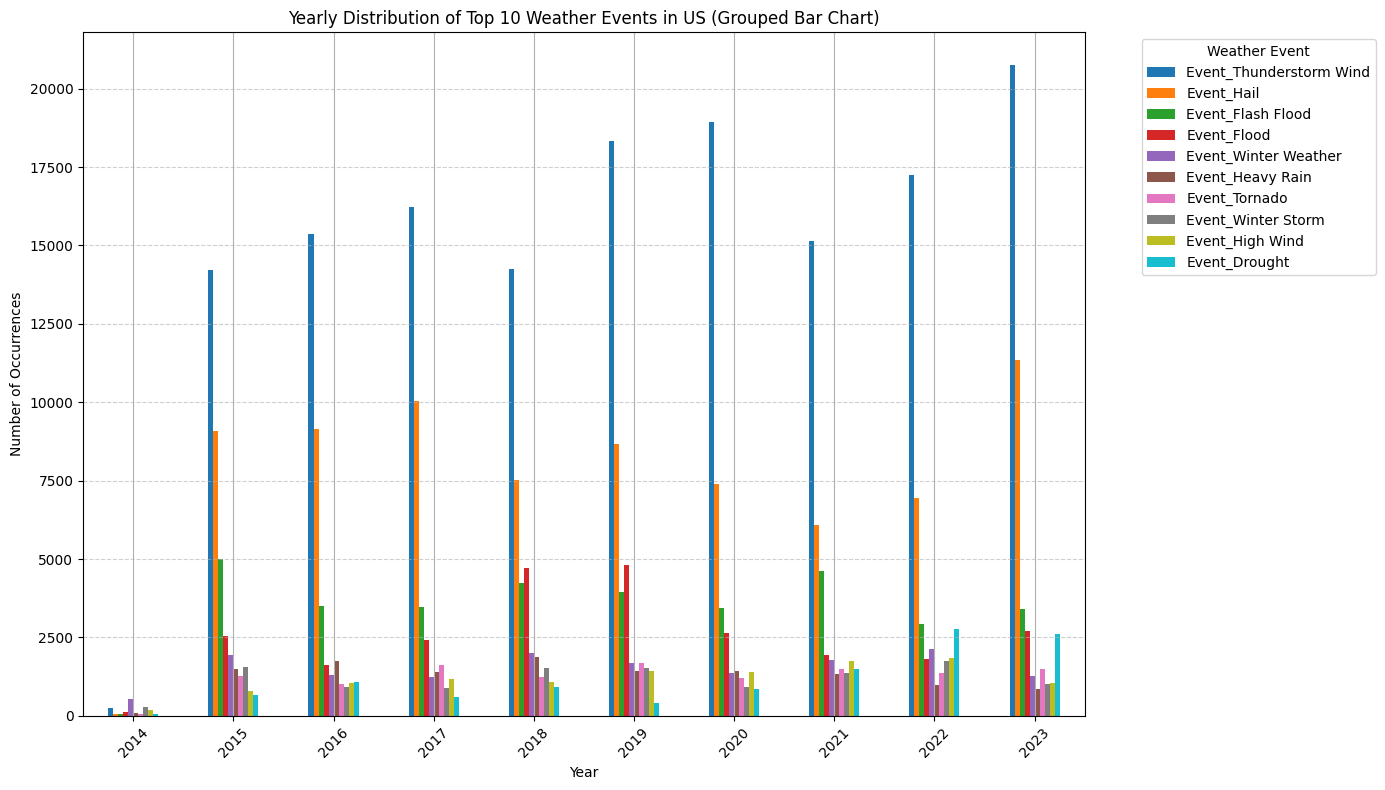

In [ ]:
# Yearly Distribution of Top 10 Weather Events in US

df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year

# Identify weather event columns (assumed to start with 'Event_')
event_columns = [col for col in df.columns if col.startswith("Event_")]

# Calculate the sum of occurrences for each event
event_sums = df[event_columns].sum().sort_values(ascending=False)

# Select the top 10 events
top_10_events = event_sums.head(10)
top_10_event_cols = top_10_events.index.tolist()

# Calculate yearly distribution
yearly_event_distribution = df.groupby("year")[top_10_event_cols].sum()

# Plot grouped bar chart
plt.figure(figsize=(14, 8))
yearly_event_distribution.plot(kind='bar', stacked=False, colormap='tab10', figsize=(14, 8))

plt.title("Yearly Distribution of Top 10 Weather Events in US (Grouped Bar Chart)")
plt.xlabel("Year")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=45)
plt.legend(title="Weather Event", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.grid(True)
plt.show()

##Total Number of Customers Affected by Year in US

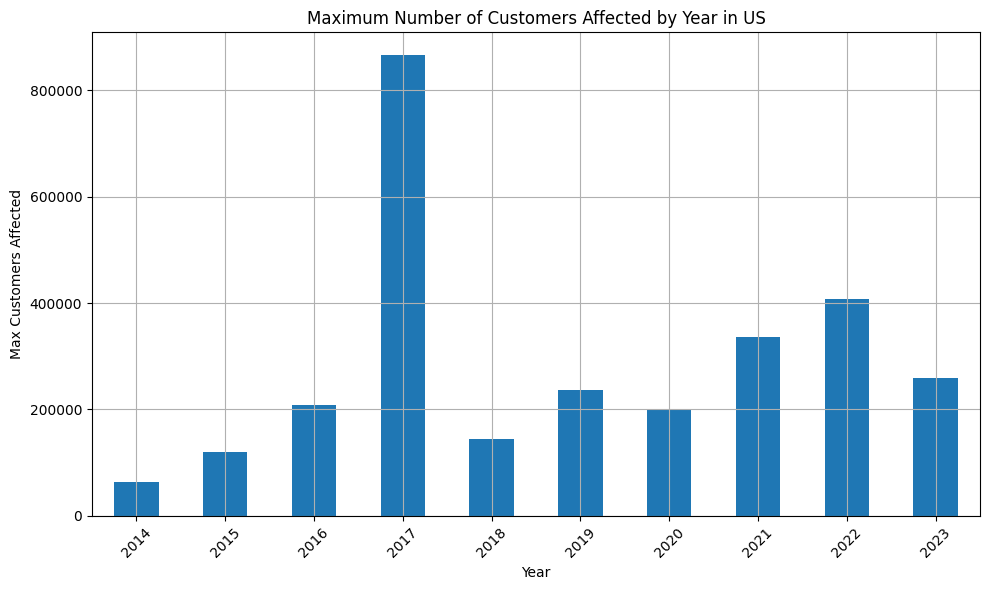

In [ ]:
# Group by year and get the maximum number of affected customers per year
max_customers_per_year = df.groupby('year')['outage_customer_ave'].max()

# Plotting
plt.figure(figsize=(10, 6))
max_customers_per_year.plot(kind='bar')
plt.title("Maximum Number of Customers Affected by Year in US")
plt.xlabel("Year")
plt.ylabel("Max Customers Affected")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.grid(True)
plt.show()

#Daily Total Outages over time

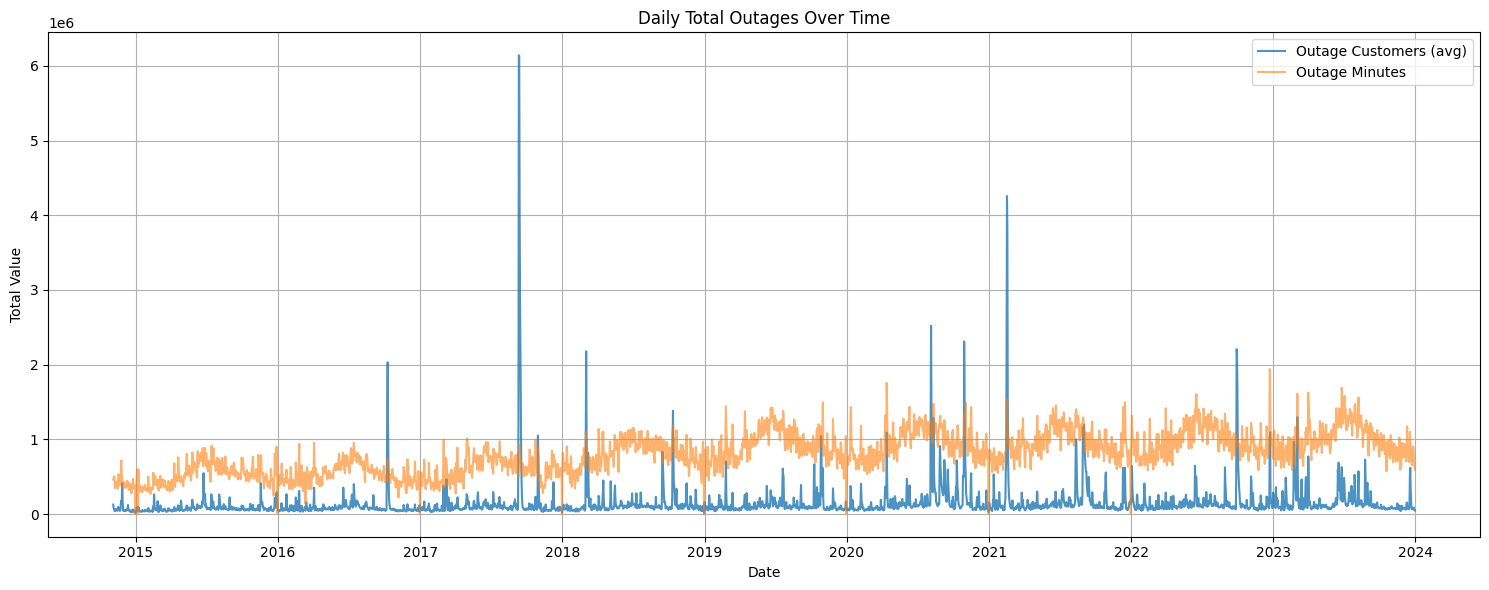

In [ ]:
# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Aggregate by date
daily_outages = df.groupby('date')[['outage_customer_ave', 'outage_minutes']].sum()

# Plot
plt.figure(figsize=(15, 6))
plt.plot(daily_outages.index, daily_outages['outage_customer_ave'], label='Outage Customers (avg)', alpha=0.8)
plt.plot(daily_outages.index, daily_outages['outage_minutes'], label='Outage Minutes', alpha=0.6)
plt.title('Daily Total Outages Over Time')
plt.xlabel('Date')
plt.ylabel('Total Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##Average Number of Customers Affected by Weather Event

In [ ]:
# Identify event columns
event_columns = [col for col in df.columns if col.startswith("Event_")]

# Reshape the dataset to long format for plotting
event_melted = df.melt(
    id_vars='outage_customer_ave',
    value_vars=event_columns,
    var_name='Event',
    value_name='Occurred'
)

# Keep only rows where the event occurred
event_melted = event_melted[event_melted['Occurred']]
event_melted['Event'] = event_melted['Event'].str.replace("Event_", "").str.replace("_", " ")

# Group by event and calculate mean outage
avg_outage_by_event = (
    event_melted.groupby('Event')['outage_customer_ave']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_outage_by_event, x='outage_customer_ave', y='Event', palette='viridis')
plt.title('Average Number of Customers Affected by Weather Event')
plt.xlabel('Average Customers Affected')
plt.ylabel('Weather Event')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

##Total Customers Affected and Top 10 Weather Events by Month in 2017

C:\Users\TSYG\AppData\Local\Temp\ipykernel_5176\2047623406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['date'] = pd.to_datetime(df_2017['date'])
C:\Users\TSYG\AppData\Local\Temp\ipykernel_5176\2047623406.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['month'] = df_2017['date'].dt.month


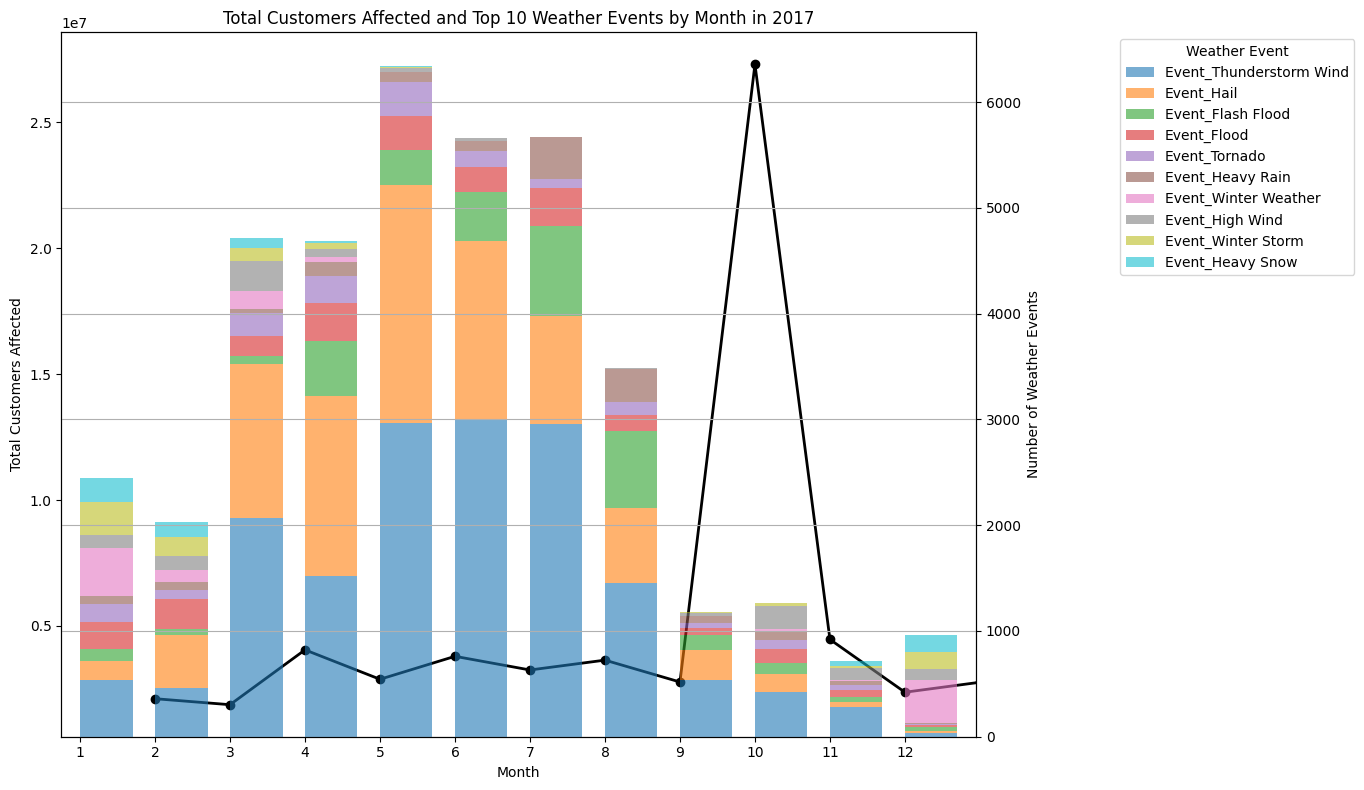

In [ ]:
# Step 1: Filter 2021 data
df_2017 = df[df['year'] == 2017]
df_2017['date'] = pd.to_datetime(df_2017['date'])
df_2017['month'] = df_2017['date'].dt.month

# Step 2: Calculate total customers affected per month
monthly_customers_affected_2017 = df_2017.groupby('month')['outage_customer_ave'].sum()

# Step 3: Identify top 10 most frequent weather events in 2021
event_columns_2017 = [col for col in df_2017.columns if col.startswith("Event_")]
top_10_events_2017 = df_2017[event_columns_2017].sum().sort_values(ascending=False).head(10).index

# Step 4: Group top 10 events by month
monthly_event_distribution_top10_2017 = df_2017.groupby('month')[top_10_events_2017].sum()

# Step 5: Plot the combined chart
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot total customers affected (line)
ax1.plot(monthly_customers_affected_2017.index, monthly_customers_affected_2017.values,
         color='black', marker='o', linewidth=2, label='Total Customers Affected')
ax1.set_xlabel("Month")
ax1.set_ylabel("Total Customers Affected", color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title("Total Customers Affected and Top 10 Weather Events by Month in 2017")

# Plot top 10 weather events (stacked bars)
ax2 = ax1.twinx()
monthly_event_distribution_top10_2017.plot(kind='bar', stacked=True, ax=ax2, alpha=0.6, width=0.7, position=0)
ax2.set_ylabel("Number of Weather Events")
ax2.legend(title="Weather Event", bbox_to_anchor=(1.15, 1), loc='upper left')

plt.tight_layout()
plt.grid(True)
plt.show()


## Top 20 States by Total Weather Event Frequency

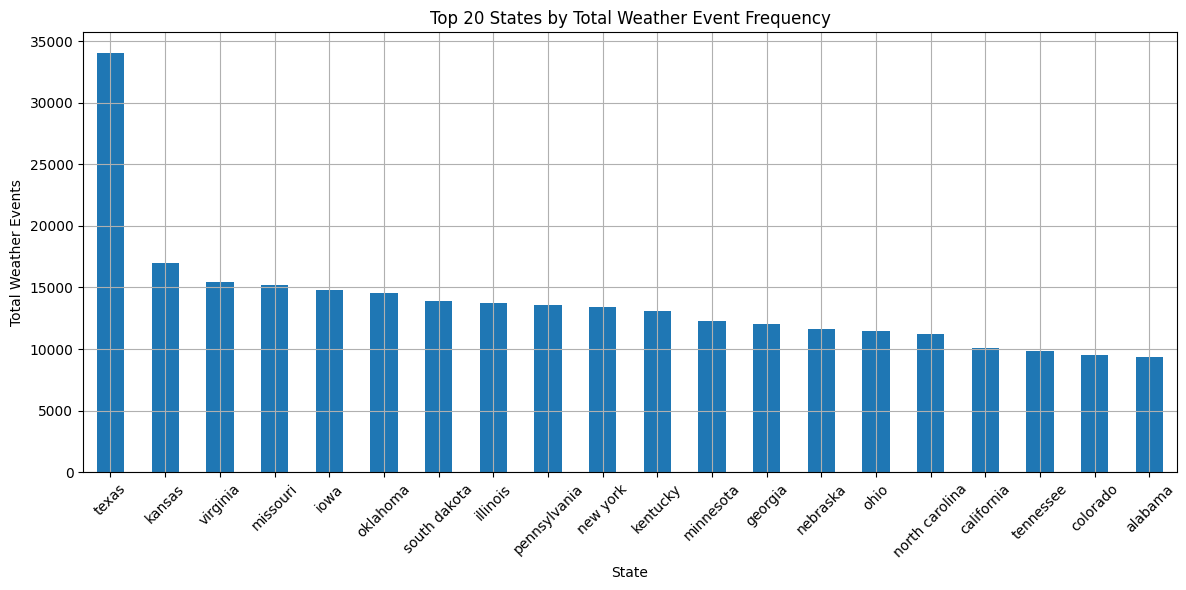

In [ ]:
# Extract all weather event columns (those that start with 'Event_')
event_columns = [col for col in df.columns if col.startswith('Event_')]

# Group by state and sum all event occurrences
state_event_totals = df.groupby('state')[event_columns].sum()

# Calculate total number of events per state
state_event_totals['total_events'] = state_event_totals.sum(axis=1)

# Get top 30 states with highest total weather events
top_20_states = state_event_totals['total_events'].sort_values(ascending=False).head(20)

# Plotting
plt.figure(figsize=(12, 6))
top_20_states.plot(kind='bar')
plt.title('Top 20 States by Total Weather Event Frequency')
plt.xlabel('State')
plt.ylabel('Total Weather Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


## Top 20 States by Total Number of customers affected

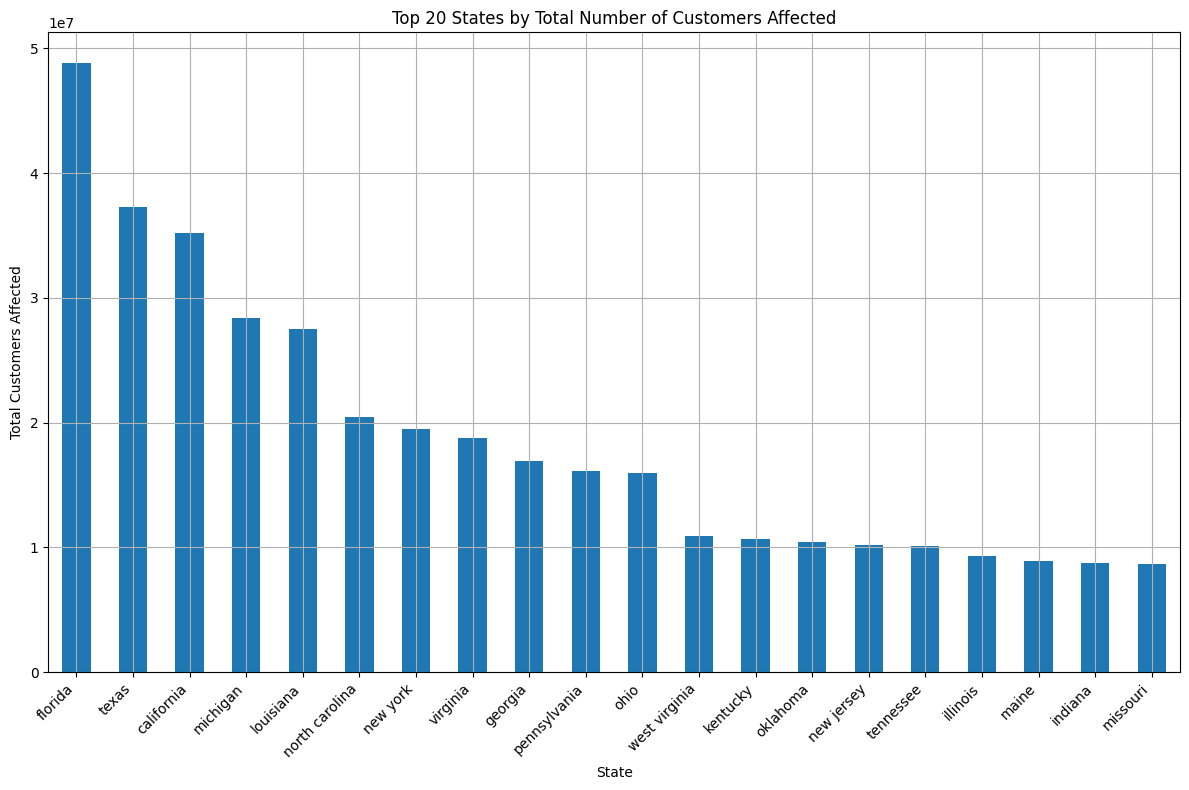

In [ ]:
# Group by state and sum the outage_customer_ave to get total customers affected
state_outage_totals = df.groupby("state")["outage_customer_ave"].sum()

# Sort and take top 30 states
top_20_states = state_outage_totals.sort_values(ascending=False).head(20)

# Plotting
plt.figure(figsize=(12, 8))
top_20_states.plot(kind='bar')
plt.title("Top 20 States by Total Number of Customers Affected")
plt.ylabel("Total Customers Affected")
plt.xlabel("State")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.grid(True)
plt.show()


## Top 20 States by total pecentage of Customers Affected

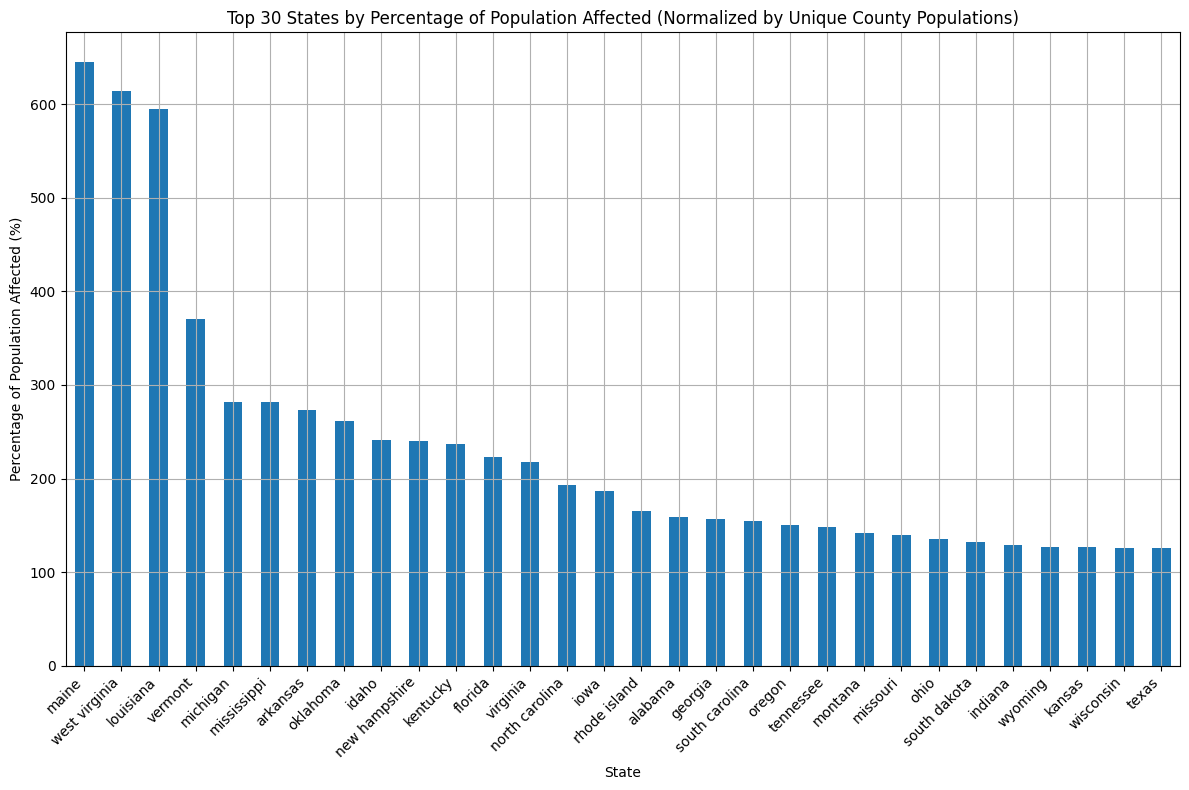

In [ ]:
# Drop duplicates to get unique county populations
unique_county_pop = df[["state", "county_fips", "population"]].drop_duplicates()

# Sum population per state using unique counties only
state_population_precise = unique_county_pop.groupby("state")["population"].sum()

# Sum total affected customers per state
state_outage_totals = df.groupby("state")["outage_customer_ave"].sum()

# Join the two series into a DataFrame
normalized_df = pd.DataFrame({
    "total_customers_affected": state_outage_totals,
    "total_population": state_population_precise
})

# Drop states with missing population data
normalized_df.dropna(inplace=True)

# Calculate percentage affected
normalized_df["percent_affected"] = (normalized_df["total_customers_affected"] / normalized_df["total_population"]) * 100

# Sort and take top 30
top_30_normalized = normalized_df.sort_values(by="percent_affected", ascending=False).head(30)

# Plotting
plt.figure(figsize=(12, 8))
top_30_normalized["percent_affected"].plot(kind='bar')
plt.title("Top 30 States by Percentage of Population Affected (Normalized by Unique County Populations)")
plt.ylabel("Percentage of Population Affected (%)")
plt.xlabel("State")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.grid(True)
plt.show()


##Population by state

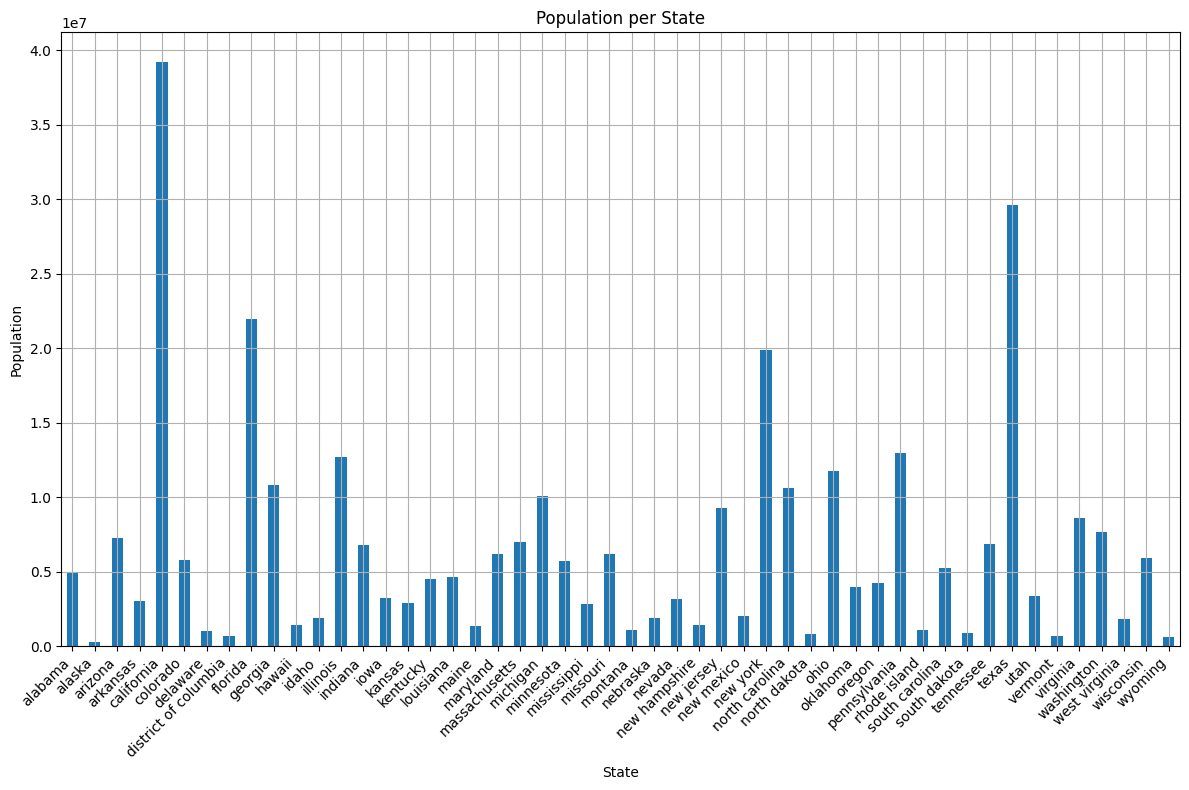

In [ ]:
# prompt: plot state_population_precise

plt.figure(figsize=(12, 8))
state_population_precise.plot(kind='bar')
plt.title("Population per State")
plt.ylabel("Population")
plt.xlabel("State")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.grid(True)
plt.show()


In [ ]:
# Filter the dataset for Texas and California
df_states = df[df["state"].isin(["texas", "california"])]

# Drop duplicate counties by using the latest population record for each county
df_latest_population = df_states.drop_duplicates(subset=["county_fips", "state"], keep='last')

# Group by state and sum the population
population_by_state = df_latest_population.groupby("state")["population"].sum()

population_by_state

state
california    39242785
texas         29640343
Name: population, dtype: int64

##Correlation between weather events and ave. number of customers affected

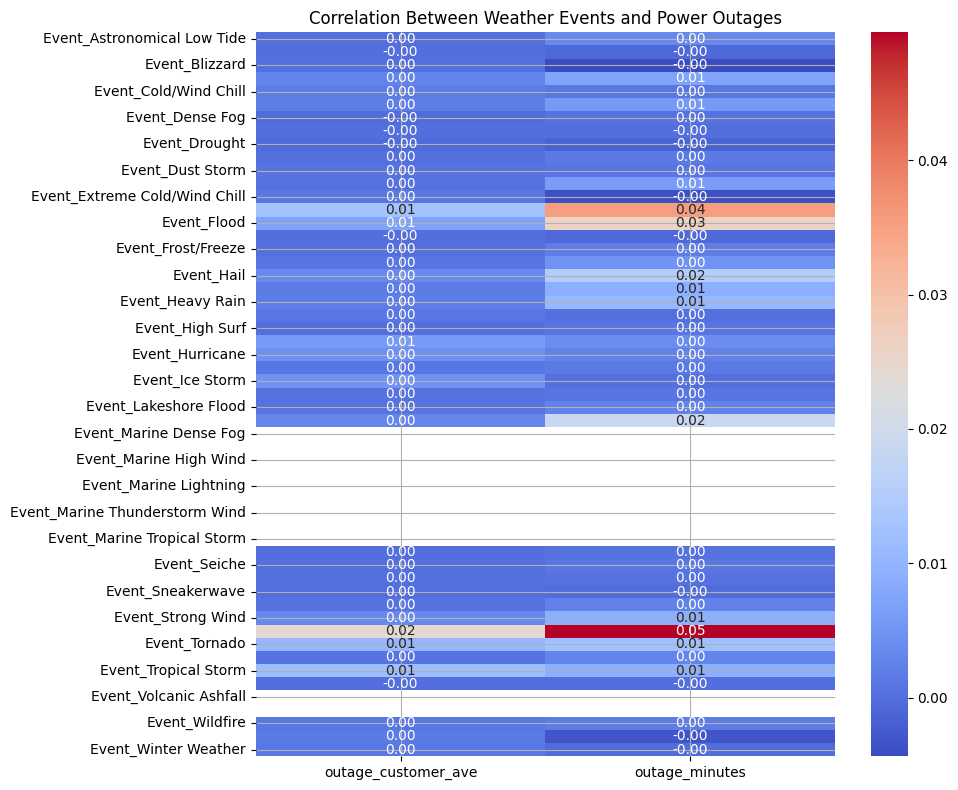

In [ ]:
# Select relevant columns
outage_metrics = ['outage_customer_ave', 'outage_minutes']
event_and_outage_df = df[event_columns + outage_metrics]

# Calculate Pearson correlation matrix
correlation_matrix = event_and_outage_df.corr(method='pearson')

# Extract correlation of each event with outages
event_correlation = correlation_matrix.loc[event_columns, outage_metrics]

plt.figure(figsize=(10, 8))
sns.heatmap(event_correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Weather Events and Power Outages")
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
print(df.memory_usage(deep=True).sum() / (1024**2), "MB")


7334.649904251099 MB


#Event_presence and outage_presence

##Adding event_presence

In [ ]:
# Identify weather event columns (assumed to start with 'Event_')
event_columns = [col for col in df.columns if col.startswith("Event_")]

# Create "event_presence" column
df["event_presence"] = (df[event_columns].sum(axis=1) > 0).astype(int)

# Insert the column after "Event_Winter Weather"
insert_after_col = "Event_Winter Weather"
insert_pos = df.columns.get_loc(insert_after_col) + 1
cols = df.columns.tolist()
cols.insert(insert_pos, cols.pop(cols.index("event_presence")))
df = df[cols]

df.head()

,county_fips,date,county,state,lat,lng,population,canopy_cover_percent,overhead_transmission_line,underground_transmission_line,...,Event_Winter Weather,event_presence,outage_customer_ave,outage_minutes,temp,windspeed,precip,median_income,poverty_percent,year
0,45001,2014-11-04,abbeville,south carolina,34.2226,-82.4593,24352,0.58092,40,0,...,0,0,0.0,0,11.292083,2.023333,100.746667,51580.0,0.15,2014
1,45001,2014-11-05,abbeville,south carolina,34.2226,-82.4593,24352,0.58092,40,0,...,0,0,0.0,0,14.072083,1.498333,100.521250,51580.0,0.15,2014
2,45001,2014-11-06,abbeville,south carolina,34.2226,-82.4593,24352,0.58092,40,0,...,0,0,0.0,0,16.577917,3.044167,99.689167,51580.0,0.15,2014
3,45001,2014-11-07,abbeville,south carolina,34.2226,-82.4593,24352,0.58092,40,0,...,0,0,0.0,0,11.150833,1.549583,99.767083,51580.0,0.15,2014
4,45001,2014-11-08,abbeville,south carolina,34.2226,-82.4593,24352,0.58092,40,0,...,0,0,4.0,90,8.710833,1.150833,99.744167,51580.0,0.15,2014


##Adding outage_presence

In [ ]:
# Create "outage_presence" column
df["outage_presence"] = (df["outage_customer_ave"] > 0).astype(int)

# Insert the new column after "outage_minutes"
insert_after_col = "outage_minutes"
insert_pos = df.columns.get_loc(insert_after_col) + 1
cols = df.columns.tolist()
cols.insert(insert_pos, cols.pop(cols.index("outage_presence")))
df = df[cols]

df.head()

C:\Users\TSYG\AppData\Local\Temp\ipykernel_1164\1288968094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["outage_presence"] = (df["outage_customer_ave"] > 0).astype(int)


,county_fips,date,county,state,lat,lng,population,canopy_cover_percent,overhead_transmission_line,underground_transmission_line,...,event_presence,outage_customer_ave,outage_minutes,outage_presence,temp,windspeed,precip,median_income,poverty_percent,year
0,45001,2014-11-04,abbeville,south carolina,34.2226,-82.4593,24352,0.58092,40,0,...,0,0.0,0,0,11.292083,2.023333,100.746667,51580.0,0.15,2014
1,45001,2014-11-05,abbeville,south carolina,34.2226,-82.4593,24352,0.58092,40,0,...,0,0.0,0,0,14.072083,1.498333,100.521250,51580.0,0.15,2014
2,45001,2014-11-06,abbeville,south carolina,34.2226,-82.4593,24352,0.58092,40,0,...,0,0.0,0,0,16.577917,3.044167,99.689167,51580.0,0.15,2014
3,45001,2014-11-07,abbeville,south carolina,34.2226,-82.4593,24352,0.58092,40,0,...,0,0.0,0,0,11.150833,1.549583,99.767083,51580.0,0.15,2014
4,45001,2014-11-08,abbeville,south carolina,34.2226,-82.4593,24352,0.58092,40,0,...,0,4.0,90,1,8.710833,1.150833,99.744167,51580.0,0.15,2014


## Match between outage_presence and event_presence

In [ ]:
# # Define the four combinations
# combinations = {
#     "Event=False, Outage=True": (df["event_presence"] == 0) & (df["outage_presence"] == 1),
#     "Event=False, Outage=False": (df["event_presence"] == 0) & (df["outage_presence"] == 0),
#     "Event=True, Outage=True": (df["event_presence"] == 1) & (df["outage_presence"] == 1),
#     "Event=True, Outage=False": (df["event_presence"] == 1) & (df["outage_presence"] == 0),
# }

# # Calculate row counts
# counts = {label: condition.sum() for label, condition in combinations.items()}

# # Calculate percentages
# total_rows = len(df)
# percentages = {label: (count / total_rows) * 100 for label, count in counts.items()}

# # Plot the results
# fig, ax = plt.subplots(figsize=(10, 6))
# bars = ax.bar(counts.keys(), counts.values(), color='skyblue')
# ax.set_ylabel("Row Count")
# ax.set_title("Counts and Percentages by Outage and Event Presence")

# # Annotate bars with percentages
# for bar, pct in zip(bars, percentages.values()):
#     height = bar.get_height()
#     ax.annotate(f"{pct:.1f}%", xy=(bar.get_x() + bar.get_width() / 2, height),
#                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


##Match between outage_presence and event_presence (consdiering 3days from weather event occurence)

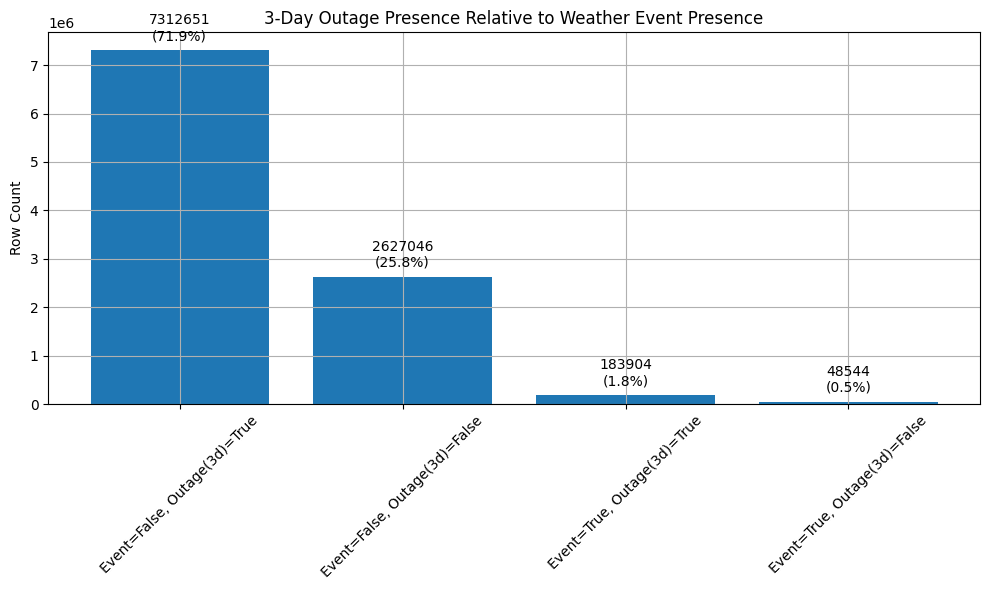

In [ ]:
# Ensure 'date' is in datetime format
df["date"] = pd.to_datetime(df["date"])

# Recreate "event_presence" and "outage_presence"
event_columns = [col for col in df.columns if col.startswith("Event_")]
df["event_presence"] = (df[event_columns].sum(axis=1) > 0).astype(int)
df["outage_presence"] = (df["outage_customer_ave"] > 0).astype(int)

# Sort by state, county, date
df_sorted = df.sort_values(by=["state", "county", "date"])

# Compute 3-day forward-looking rolling max of outage_presence
df_sorted["outage_presence_3d"] = (
    df_sorted.groupby(["state", "county"])["outage_presence"]
    .transform(lambda x: x.rolling(window=3, min_periods=1).max().shift(-2))
    .fillna(0)
    .astype(int)
)

# Define combinations
combinations_3d = {
    "Event=False, Outage(3d)=True": (df_sorted["event_presence"] == 0) & (df_sorted["outage_presence_3d"] == 1),
    "Event=False, Outage(3d)=False": (df_sorted["event_presence"] == 0) & (df_sorted["outage_presence_3d"] == 0),
    "Event=True, Outage(3d)=True": (df_sorted["event_presence"] == 1) & (df_sorted["outage_presence_3d"] == 1),
    "Event=True, Outage(3d)=False": (df_sorted["event_presence"] == 1) & (df_sorted["outage_presence_3d"] == 0),
}

# Count and percentage
counts_3d = {label: condition.sum() for label, condition in combinations_3d.items()}
percentages_3d = {label: (count / len(df_sorted)) * 100 for label, count in counts_3d.items()}

# Plot results
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(counts_3d.keys(), counts_3d.values())
ax.set_ylabel("Row Count")
ax.set_title("3-Day Outage Presence Relative to Weather Event Presence")

# Annotate with counts and percentages
for bar, (pct, label) in zip(bars, zip(percentages_3d.values(), counts_3d.values())):
    height = bar.get_height()
    ax.annotate(f"{label}\n({pct:.1f}%)", xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords="offset points", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()
